In [1]:
proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)
proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

ModuleNotFoundError: No module named 'Sudoku'

In [31]:
import cv2
import numpy as np
i = '../DATA/sudoku.jpg'
img = cv2.imread(i)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


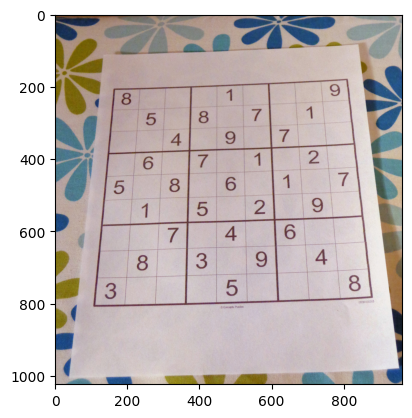

In [27]:
import matplotlib.pyplot as plt
plt.imshow(img)

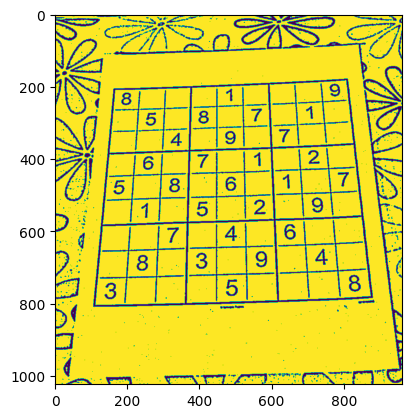

In [32]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

proc = cv2.GaussianBlur(img.copy(), (9, 9), 0)
proc = cv2.adaptiveThreshold(proc, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(proc)

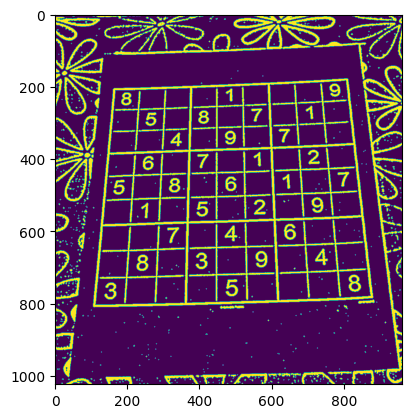

In [38]:
proc = cv2.bitwise_not(proc, proc)  
kernel = np.array([[0., 1., 0.], [1., 1., 1.], [0., 1., 0.]],np.uint8)
proc = cv2.dilate(proc, kernel)
plt.imshow(proc)


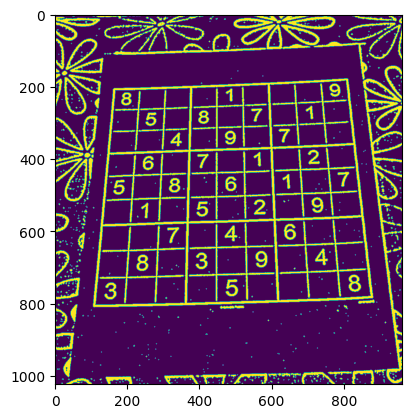

In [18]:
# _, contours, h = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = sorted(contours, key=cv2.contourArea, reverse=True)
# polygon = contours[0]
contours, h = cv2.findContours(img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)
polygon = contours[0]

plt.imshow(proc)


In [23]:
import operator
bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in
                      polygon]), key=operator.itemgetter(1))
top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in
                  polygon]), key=operator.itemgetter(1))
bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in
                     polygon]), key=operator.itemgetter(1))
top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in
                   polygon]), key=operator.itemgetter(1))

In [25]:
[polygon[top_left][0], polygon[top_right][0], polygon[bottom_right][0], polygon[bottom_left][0]]


In [29]:
import cv2

# Загрузить изображение
img = cv2.imread('../DATA/sudoku.jpg')

# Преобразовать в черно-белое изображение
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Найти контуры
contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours = sorted(contours, key=cv2.contourArea, reverse=True)
polygon = contours[0]

bottom_right, _ = max(enumerate([pt[0][0] + pt[0][1] for pt in
                      polygon]), key=operator.itemgetter(1))
top_left, _ = min(enumerate([pt[0][0] + pt[0][1] for pt in
                  polygon]), key=operator.itemgetter(1))
bottom_left, _ = min(enumerate([pt[0][0] - pt[0][1] for pt in
                     polygon]), key=operator.itemgetter(1))
top_right, _ = max(enumerate([pt[0][0] - pt[0][1] for pt in
                   polygon]), key=operator.itemgetter(1))

# Отобразить изображение с контуром
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
top_left, top_right, bottom_right, bottom_left = crop_rect[0], crop_rect[1], crop_rect[2], crop_rect[3]
src = np.array([top_left, top_right, bottom_right, bottom_left], dtype='float32') 
side = max([  distance_between(bottom_right, top_right), 
            distance_between(top_left, bottom_left),
            distance_between(bottom_right, bottom_left),   
            distance_between(top_left, top_right) ])